In [101]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [102]:
HOUSING_PATH = os.path.join('datasets')

def fetch_housing_path(housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)

fetch_housing_path()

In [103]:
def load_data_(data, data_path=HOUSING_PATH):
    csv_path = os.path.join(data_path, data)
    return pd.read_csv(csv_path)

## Dataset

In [104]:
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [105]:
X.shape, X_train.shape, X_test.shape

((500, 2), (350, 2), (150, 2))

# KneighborsClassifier

In [106]:
k_neigh = KNeighborsClassifier(n_jobs=-1)
k_neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [107]:
import time
import datetime

start_time = datetime.datetime.now()
k_neigh.fit(X_train, y_train)
print("Time elapse:", datetime.datetime.now() - start_time)

Time elapse: 0:00:00.001000


### Критерий качества

In [108]:
y_pred = k_neigh.predict(X_test)
accuracy_score(y_test, y_pred)

0.9

In [109]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'yo', alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'bs', alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

### Рисунок

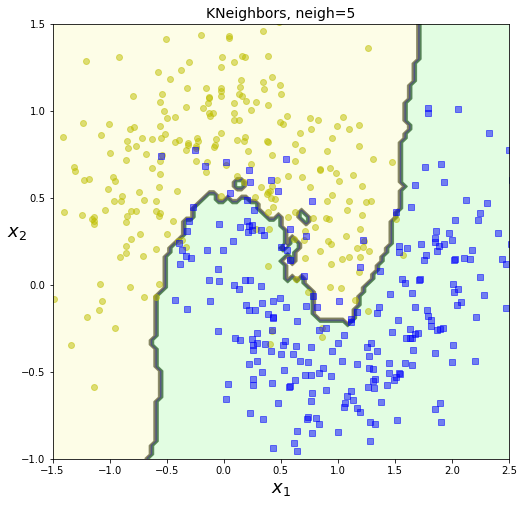

In [45]:
plt.figure(figsize=(18, 8))
plt.subplot(121)
plot_decision_boundary(k_neigh, X, y)
plt.title('KNeighbors, neigh=5', fontsize=14)
plt.show()

In [46]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [51]:

cvs = cross_val_score(k_neigh, X, y, cv=kf, scoring='accuracy')
cvs.mean()

0.9099999999999999

## Cross validation

In [56]:
max_mean = -1
start_time = datetime.datetime.now()
for i in range(1, 20, 2):
    clf = KNeighborsClassifier(n_jobs=-1, n_neighbors=i)
    cvs = cross_val_score(clf, X, y, cv=kf, scoring='accuracy')
    mean = cvs.mean()
    print(str(i) + ": " + str(mean))
    if mean > max_mean:
        max_mean = mean
        max_n = i
print("Time elapse: ", datetime.datetime.now() - start_time)
print(max_n, max_mean)

1: 0.858
3: 0.9040000000000001
5: 0.9099999999999999
7: 0.922
9: 0.9200000000000002
11: 0.9199999999999999
13: 0.9219999999999999
15: 0.9179999999999999
17: 0.9119999999999999
19: 0.908
Time elapse:  0:00:00.820541
7 0.922


### При 7 соседях самая лучшая модель с точностью 0.922

In [65]:
k_best_n = KNeighborsClassifier(n_jobs=-1, n_neighbors=7)
k_best_n.fit(X_train, y_train)
y_pred = k_best_n.predict(X_test)
accuracy_score(y_test, y_pred)

0.9133333333333333

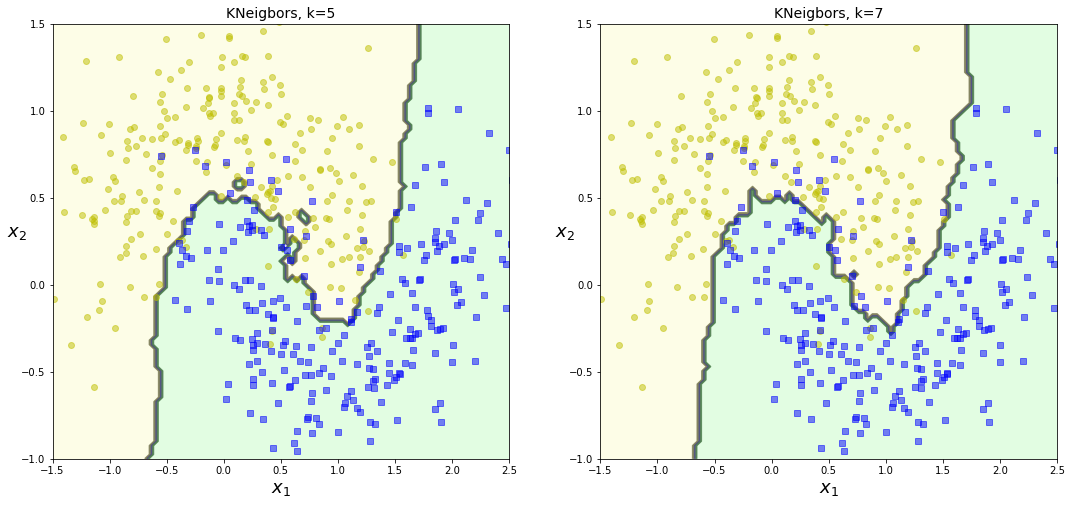

In [60]:
plt.figure(figsize=(18, 8))
plt.subplot(121)
plot_decision_boundary(k_neigh, X, y)
plt.title('KNeigbors, k=5', fontsize=14)
plt.subplot(122)
plot_decision_boundary(k_best_n, X, y)
plt.title("KNeigbors, k=7", fontsize=14)
plt.show()

## GridSearchCV

In [94]:
start_time = datetime.datetime.now()
param_grid = [{'n_neighbors': [3, 5, 7, 9, 11], 'algorithm': ['ball_tree', 'kd_tree', 'brute'],
              'weights': ['uniform', 'distance']}]
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=kf, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Time elapse: ", datetime.datetime.now() - start_time)

Time elapse:  0:00:00.188795


In [99]:
k_best_new = grid_search.best_estimator_
k_best_new.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [100]:
y_pred = k_best_new.predict(X_test)
accuracy_score(y_test, y_pred)

0.9